<a href="https://colab.research.google.com/github/senorred/IDS-Data-Challenges/blob/master/Norred_Liz_NYCrestaurants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NYC Restaurant inspection data 
Liz Norred

Goals:
Identify trends, insights, and recommentations to consumers or inspectors
1. Potential customers would prefer to not get sick from the food they eat. But completely avoiding lower-grade restaurants might be an oversimplification. There are some tradeoffs to be considered here.
2. There are a limited number of inspectors and inspections take time. Therefore the number of inspections is also limited.
3. Your stakeholders are looking to you for context and recommendations.


Approach:
Familiarize myself with data
  1. Failures and types of failures
  2. Critical failures most likely to result in illness
  3. Grading and repeat evaluations

Explore: Critical Failures (critical flag), closures (action). Frequency of each, restaurants of same name with similar problems
e.g. more failures over time = repeat offender, few failures sporadically = not so bad (P followed by an A, initial inspection low vs total inspections)


ANSWER: In addition to overall grade:

What is their average score vs their most recent score?
  improving (declining) over time
How many critical fails total and in the last inspection?

What is their proportion of critical fails/total fails?
  decreasing over time

Consumer-directed values-- can make own judgement based on restaurant's improvement over time. 

Inspector-directed: can flag potential problem locations for continuous non-compliance. future steps could resolve this into individual codes-- 


---



e.g. multiple closures

Violation code: repeat code that never gets better

Repeat offenders may be candidates for permanent closure if they take substantial amt of inspector's time



In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

##Import Data and characterize

In [0]:
data=[]
for x in range(1,7):
  filename='/gdrive/My Drive/Insight Data Science/Data Challenges/nyc_restaurants/DOHMH_New_York_City_Restaurant_Inspection_Results_%d_of_6.txt' % (x)
  temp= pd.read_csv(filename)
  data.append(temp)

data = pd.concat(data)


want to split up the combo category of "inspection type" because violations and grades reference this

In [0]:
data.rename(columns={'INSPECTION TYPE': 'insp_type'}, inplace=True)
data[['insp_program','insp_performed']] = data.insp_type.str.split("/",expand=True,)
data.head()

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,insp_type,insp_program,insp_performed
0,0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Cycle Inspection,Initial Inspection
1,1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection,Administrative Miscellaneous,Initial Inspection
2,2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection,Pre-permit (Operational),Initial Inspection
3,3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection,Pre-permit (Operational),Initial Inspection
4,4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Cycle Inspection,Initial Inspection


Impressions of the data:
Action: Usually refers to violation citations. 


Grade value is missing 51% of the time, as is grade date. Grade Date, or the date the grade was issued to the restaurant, is missing for half of the values. Approaching this as a sequential or time series based on grade may not be efficient. 

Score has a range of 153, from -2 to 151. Not sure what the maximum possible score is. Score is updated based on adjudicated results. 

55% of flags are critical

##Profile Report on all Data

In [0]:
ProfileReport(data)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,22
Number of observations,399918
Total Missing (%),5.2%
Total size in memory,67.1 MiB
Average record size in memory,176.0 B
Numeric,5
Categorical,16
Boolean,0
Date,0
Text (Unique),0
Rejected,1


##Maggie's place example, arrange it by date to see how values change
Restaurant has an "A" but also a critical failure. Organize all reports by date to see what's happening here.




In [0]:
maggie= data[data['CAMIS']==40368318]
maggie['INSPECTION DATE']=pd.to_datetime(maggie['INSPECTION DATE'], format='%m/%d/%Y', errors='coerce')
smag= maggie
maggie.sort_values(by=['INSPECTION DATE'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,insp_type,insp_program,insp_performed
33223,366488,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,2013-10-09,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,26.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Cycle Inspection,Initial Inspection
58644,58644,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,2013-10-09,Violations were cited in the following area(s).,10D,Mechanical or natural ventilation system not p...,Not Critical,26.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Cycle Inspection,Initial Inspection
7749,341014,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,2013-10-09,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,Critical,26.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Cycle Inspection,Initial Inspection
19224,219183,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,2013-10-09,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,26.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Cycle Inspection,Initial Inspection
66083,399348,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,2013-10-09,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,26.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Cycle Inspection,Initial Inspection
6225,139531,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,2014-01-15,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,13.0,A,01/15/2014,08/28/2017,Cycle Inspection / Re-inspection,Cycle Inspection,Re-inspection
44950,44950,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,2014-01-15,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,13.0,A,01/15/2014,08/28/2017,Cycle Inspection / Re-inspection,Cycle Inspection,Re-inspection
54437,321049,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,2014-01-15,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,01/15/2014,08/28/2017,Cycle Inspection / Re-inspection,Cycle Inspection,Re-inspection
55681,55681,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,2014-06-16,Violations were cited in the following area(s).,02H,Food not cooled by an approved method whereby ...,Critical,16.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Cycle Inspection,Initial Inspection
30747,297359,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,2014-06-16,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,16.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Cycle Inspection,Initial Inspection


In [0]:
print('The average score is', maggie['SCORE'].mean())
print('The most recent score is', maggie['SCORE'].iloc[-1])

The average score is 15.214285714285714
The most recent score is 12.0


In [0]:
crit_tot= maggie['CRITICAL FLAG']=='Critical'
print('Total proportion of critical fails:', (crit_tot.sum()/len(crit_tot)))
print('Total number of critical fails:', crit_tot.sum())

#critical fails from most recent inspection
last_insp= maggie['INSPECTION DATE'].iloc[-1]
crit_last= maggie[maggie['INSPECTION DATE']==last_insp]
crit_last2= crit_last['CRITICAL FLAG']=='Critical'
print('Proportion of critical fails in last inspection:', (crit_last2.sum()/len(crit_last2)))
print('Number of critical fails in last inspection:', crit_last2.sum())


Total proportion of critical fails: 0.6071428571428571
Total number of critical fails: 17
Proportion of critical fails in last inspection: 1.0
Number of critical fails in last inspection: 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


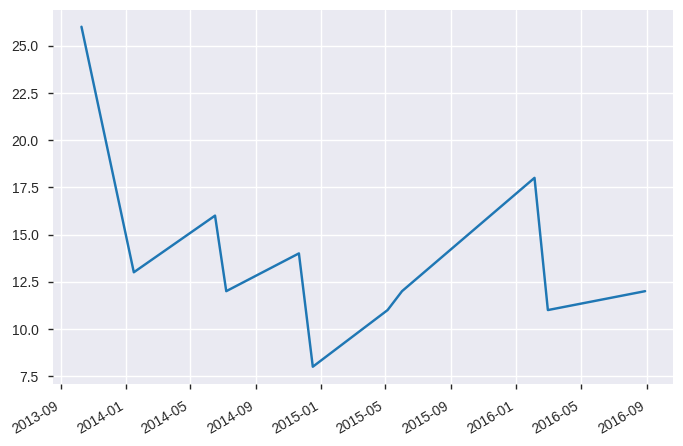

In [0]:
# plot
smag.sort_values(by=['INSPECTION DATE'], inplace= True)
plt.plot(smag['INSPECTION DATE'],smag['SCORE'])
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

##Grade 
This is not really that informative as a graph... most values are missing (51%), as is grade date. This seems to be in part because initial evaluations where there is a re-inspection do not show a grade. The "count" here is not actually showing the number of individual restaurants with grades, but rather how many violations are associated with places that recieved a grade of A.

Most reported grades are A's. This is because re-inspections have higher grades, however, there are likely also about half as many violations on re-inspection.

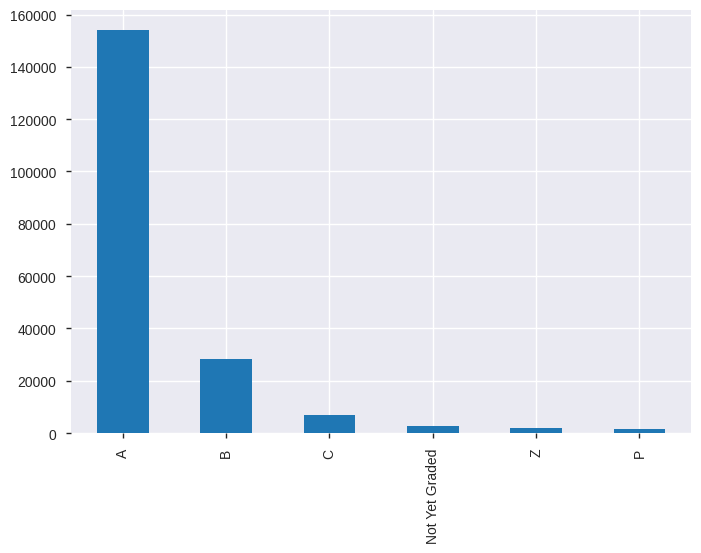

In [0]:
fig, ax = plt.subplots()
data['GRADE'].value_counts().plot(ax=ax, kind='bar')

##Critical Flag
In general, when a violation is made, it is more likely to be a critical violation


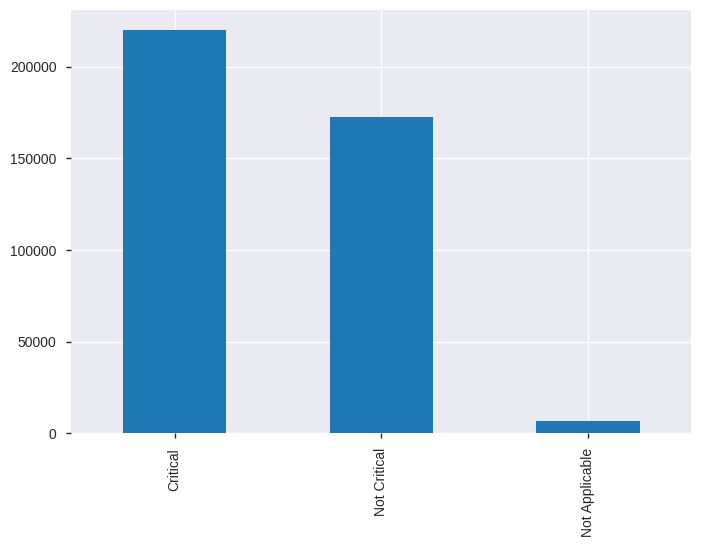

In [0]:
fig, ax = plt.subplots()
data['CRITICAL FLAG'].value_counts().plot(ax=ax, kind='bar')

##Inspection type and program per violation
Most inspection violations are found during regular cycle inspection. Far fewer are associated with pre-permit and other administrative inspections

Most violations aree found on initial inspections, with re-inspections finding about half as much.

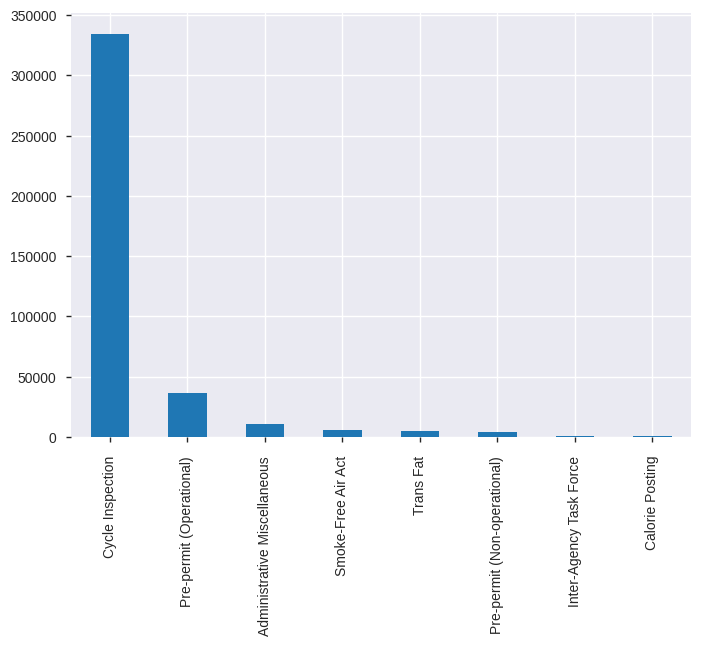

In [0]:
fig, ax = plt.subplots()
data['insp_program'].value_counts().plot(ax=ax, kind='bar')

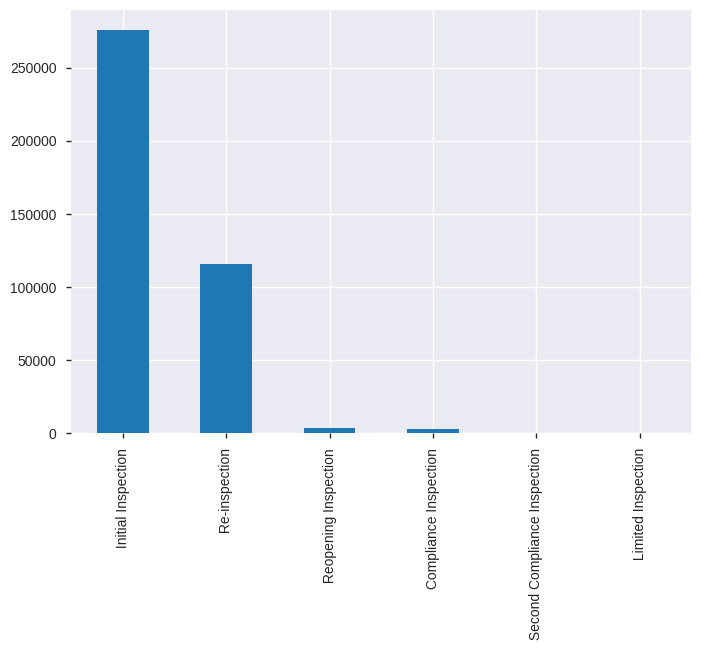

In [0]:
fig, ax = plt.subplots()
data['insp_performed'].value_counts().plot(ax=ax, kind='bar')

In [0]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

## Critical Failures


In [0]:
crit= data[data['CRITICAL FLAG']=='Critical']
crit.tail()
#critI= crit[crit['INSPECTION TYPE']=='Cycle Inspection / Initial Inspection']


,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,insp_type,insp_program,insp_performed
66645,399910,50019242,RICHNESS RESTAURANT,BROOKLYN,1063,RUTLAND RD,11212.0,7189752561,Caribbean,03/14/2016,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,11.0,A,03/14/2016,08/28/2017,Cycle Inspection / Initial Inspection,Cycle Inspection,Initial Inspection
66646,399911,50014213,SUGARDADDY'S,QUEENS,5107,27TH ST,11101.0,7187069600,American,11/20/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,7.0,NaN,NaN,08/28/2017,Pre-permit (Non-operational) / Initial Inspection,Pre-permit (Non-operational),Initial Inspection
66647,399912,41368406,DUNKIN' DONUTS,QUEENS,10801,GRAND CENTRAL PARKWAY,11369.0,7184781926,Donuts,05/02/2017,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,9.0,A,05/02/2017,08/28/2017,Cycle Inspection / Initial Inspection,Cycle Inspection,Initial Inspection
66648,399913,41004284,CAFE CLASSICO,MANHATTAN,35,WEST 57 STREET,10019.0,2123555411,Jewish/Kosher,01/28/2016,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,19.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Cycle Inspection,Initial Inspection
66649,399914,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,02/29/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,A,02/29/2016,08/28/2017,Cycle Inspection / Re-inspection,Cycle Inspection,Re-inspection


##Profile Report (critical fails)

In [0]:
ProfileReport(crit)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,22
Number of observations,220082
Total Missing (%),4.9%
Total size in memory,36.9 MiB
Average record size in memory,176.0 B
Numeric,5
Categorical,15
Boolean,0
Date,0
Text (Unique),0
Rejected,2
